In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('turbines.xlsx')

In [3]:
# Get needed data, label is RD, and features are Loc and RP
df_data = df.iloc[:,[7,8,9]]
df_data = df_data.drop(index=[1510])
df_data.tail()

,Offshore,Rated power,Rotor diameter
1505,Yes,10000,150
1506,Yes,10000,170
1507,Yes,10000,190
1508,Yes,10000,145
1509,Yes,10000,190


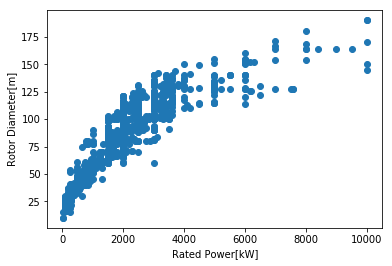

In [4]:
# a general plot to see the relationship between RD and RP
plt.scatter(df_data['Rated power'],df_data['Rotor diameter'])
plt.xlabel('Rated Power[kW]')
plt.ylabel('Rotor Diameter[m]')
plt.show()

In [5]:
# change the loc of wind turbine to numeric values, where 1 means offshore and 0 means onshore
offshore = []
for i in range(df_data.shape[0]):
    if df_data.loc[i][0] == 'Yes':
        offshore.append(1)
    if df_data.loc[i][0] == 'No':
        offshore.append(0)
len(offshore)    

1510

In [6]:
df_data['Offshore'] = offshore
df_data.head()

,Offshore,Rated power,Rotor diameter
0,0,15,10
1,0,20,10
2,0,40,15
3,0,60,15
4,0,100,29


In [7]:
# By using linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
X = df_data.values.copy()
y = X[:,2]
x = X[:,[0,1]] # using all the features
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [9]:
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

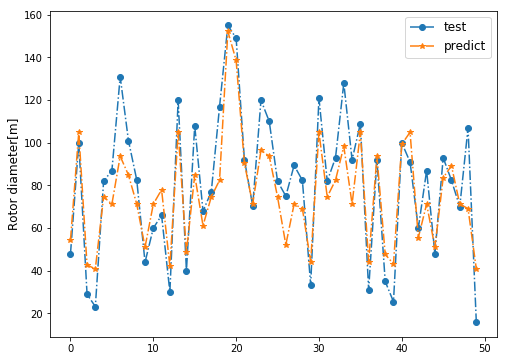

Text(0, 0.5, 'predict')

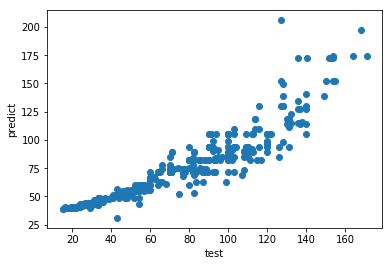

In [10]:
# plot the test dataset with the predicted one
plt.figure(figsize=(8,6))
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_LR[0:50],'-.*',markersize=6,label='predict')
plt.ylabel('Rotor diameter[m]',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [11]:
from sklearn import metrics

In [12]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

11.429132880073064 209.92651408567997 14.488841019408005


In [13]:
regr.score(x_train, y_train),regr.score(x_test, y_test),regr.coef_

(0.7866449049512457, 0.8350611837106251, array([-20.07407376,   0.02245271]))

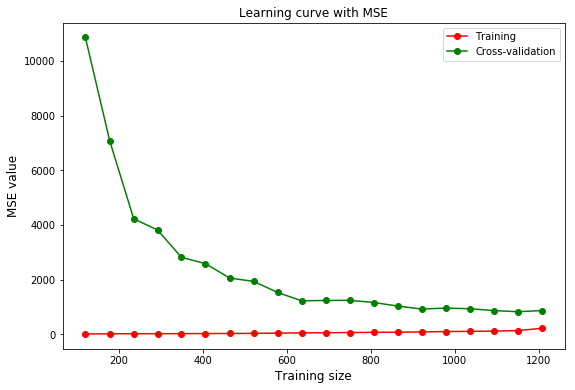

In [14]:
# plot the learning curve to see how the model performs
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(regr, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5,scoring = 'neg_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.figure(figsize=(9,6))
plt.plot(train_sizes, -train_scores_mean, 'o-', color="r",
                 label="Training")
plt.plot(train_sizes, -test_scores_mean, 'o-', color="g",
                 label="Cross-validation")
plt.xlabel('Training size',fontsize = 12)
plt.ylabel('MSE value',fontsize = 12)
plt.title('Learning curve with MSE',fontsize = 12)
plt.legend(loc="best")
plt.savefig('learning_curve.png')
plt.show()

In [15]:
train_scores_mean,test_scores_mean

(array([ -13.58496526,  -20.34175212,  -22.60509571,  -22.64398132,
         -25.61310961,  -28.66934296,  -32.29318258,  -36.58415172,
         -44.94684008,  -52.70993916,  -60.2989171 ,  -66.09962355,
         -73.28944644,  -78.99284574,  -88.69880044, -101.45946171,
        -110.59573158, -117.52934938, -137.10790472, -221.41375827]),
 array([-10853.50967508,  -7070.32561005,  -4227.49971405,  -3813.42766348,
         -2814.278234  ,  -2585.50211764,  -2057.3562001 ,  -1936.31225148,
         -1531.65992366,  -1227.15363961,  -1238.4454735 ,  -1244.237664  ,
         -1163.7481262 ,  -1035.87957401,   -924.74720992,   -959.7625267 ,
          -937.09556859,   -868.73930754,   -827.9129515 ,   -868.80300475]))

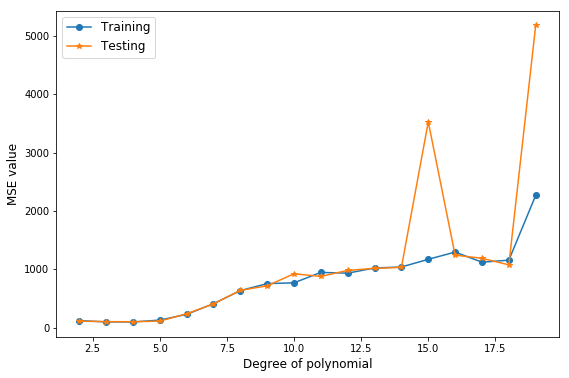

In [17]:
# adding more features by PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
x_p = X[:,[0,1]]
y_r = X[:,[2]]
train_scores = []
test_scores = []
for i in range(2,20):
    poly = PolynomialFeatures(i)
    x_prime = poly.fit_transform(x_p)
    x_train, x_test, y_train, y_test = train_test_split(x_prime,y_r)
    regr = LinearRegression()
    regr.fit(x_train,y_train)
    y_pred_1 = regr.predict(x_train)
    y_pred_2 = regr.predict(x_test)
    train_scores.append(metrics.mean_squared_error(y_train,y_pred_1))
    test_scores.append(metrics.mean_squared_error(y_test,y_pred_2))
    
plt.figure(figsize=(9,6))
plt.plot(range(2,20),train_scores,'o-',label = 'Training')
plt.plot(range(2,20),test_scores,'*-',label = 'Testing')
plt.legend(fontsize = 12)
plt.xlabel('Degree of polynomial',fontsize=12)
plt.ylabel('MSE value',fontsize=12)
plt.show()   

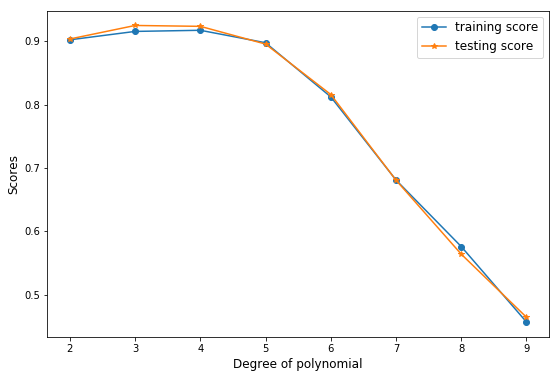

In [18]:
# adding more features by PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
x_p = X[:,[0,1]]
y_r = X[:,[2]]
train_scores = []
test_scores = []
for i in range(2,10):
    poly = PolynomialFeatures(i)
    x_prime = poly.fit_transform(x_p)
    x_train, x_test, y_train, y_test = train_test_split(x_prime,y_r)
    regr = LinearRegression()
    regr.fit(x_train,y_train)
    train_scores.append(regr.score(x_train,y_train))
    test_scores.append(regr.score(x_test,y_test))
    
plt.figure(figsize=(9,6))
plt.plot(range(2,10),train_scores,'o-',label = 'training score')
plt.plot(range(2,10),test_scores,'*-',label = 'testing score')
plt.legend(fontsize = 12)
plt.xlabel('Degree of polynomial',fontsize=12)
plt.ylabel('Scores',fontsize=12)
plt.show()   

0.9039481895324513 0.8989806196980075


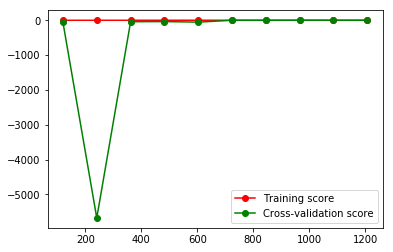

In [19]:
x_p = X[:,[0,1]]# only with RP
y_r = X[:,[2]]
poly = PolynomialFeatures(2)
x_prime = poly.fit_transform(x_p)
x_train, x_test, y_train, y_test = train_test_split(x_prime,y_r)
regr = LinearRegression()
regr.fit(x_train,y_train)
print(regr.score(x_train, y_train),regr.score(x_test, y_test))

train_sizes, train_scores, valid_scores = learning_curve(regr, x_prime, y_r, train_sizes=np.linspace(0.1, 1.0, 10),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()


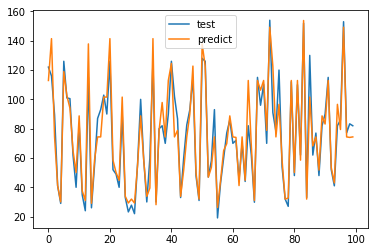

Text(0, 0.5, 'predict')

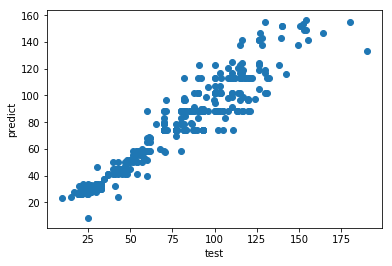

In [20]:
y_pred_LR = regr.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [21]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

7.889643799098184 124.08209011567457 11.1392140708254


In [22]:
# Testing
x_1 = [[0,3000]]
poly = PolynomialFeatures(2)
x_2 = poly.fit_transform(x_1)
regr.predict(x_2)

array([[112.88789376]])

In [23]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor

parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, np.ravel(y_train))
y_pred_RF = RF_model.predict(x_test)

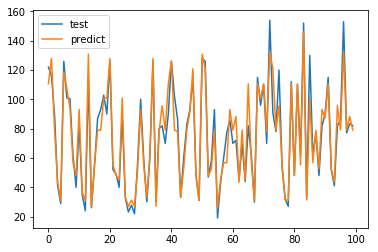

Text(0, 0.5, 'predict')

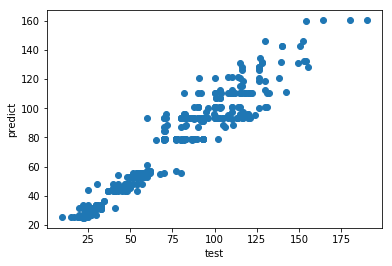

In [24]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [25]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

7.380966244085078 106.34579911581908 10.312409956737516


In [26]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.9206833304298183, 0.913420327507498)

In [41]:
# by using SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)


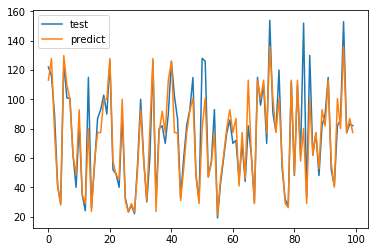

Text(0, 0.5, 'predict')

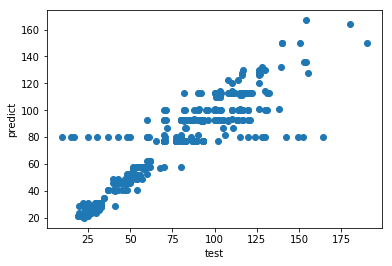

In [42]:
svr_rbf.fit(x_train,np.ravel(y_train))
y_pred_svr_rbf = svr_rbf.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_svr_rbf)
plt.xlabel('test')
plt.ylabel('predict')

In [43]:
MAE_SVR1=metrics.mean_absolute_error(y_test,y_pred_svr_rbf) 
MSE_SVR1=metrics.mean_squared_error(y_test,y_pred_svr_rbf)  
RMSE_SVR1= np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr_rbf))
print(MAE_SVR1,MSE_SVR1,RMSE_SVR1)

9.148661931680696 242.02868877185114 15.557271250828377


In [44]:
svr_rbf.score(x_train,y_train),svr_rbf.score(x_test,y_test)

(0.9266463958927023, 0.8029563482349203)

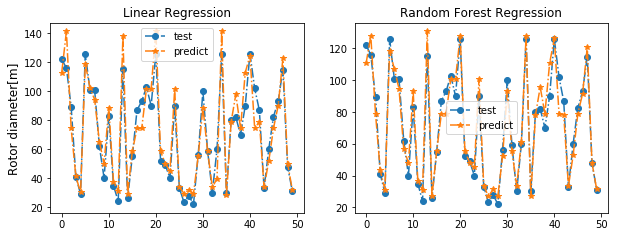

In [47]:
plt.figure(figsize=(10,3.5))
plt.subplot(121)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_LR[0:50],'-.*',markersize=6,label='predict')
plt.ylabel('Rotor diameter[m]',fontsize=12)
plt.legend()
plt.title('Linear Regression')

plt.subplot(122)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_RF[0:50],'-.*',markersize=6,label='predict')
plt.legend()
plt.title('Random Forest Regression')

plt.show()
#plt.savefig('comparison1.png')

In [48]:
# feature extraction, adding new features P**0.5 ,log(P) and P**2
df_data['P_sqrt'] = df_data['Rated power']**0.5
df_data['P_log'] = np.log(list(df_data['Rated power']))
df_data['P_square'] = df_data['Rated power']**2
df_data.head()

,Offshore,Rated power,Rotor diameter,P_sqrt,P_log,P_square
0,0,15,10,3.87298,2.708050,225
1,0,20,10,4.47214,2.995732,400
2,0,40,15,6.32456,3.688879,1600
3,0,60,15,7.74597,4.094345,3600
4,0,100,29,10,4.605170,10000


In [50]:
# feature selection
from sklearn.ensemble import ExtraTreesRegressor
X = df_data.values.copy()
y = X[:,2]
x = X[:,[0,1,3,4,5]]
model = ExtraTreesRegressor()
model.fit(x, y)
print(model.feature_importances_)

[0.00347484 0.24454267 0.33353055 0.39553381 0.02291814]


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [51]:
from sklearn.feature_selection import RFE
model=LinearRegression() # LinearRegression Model as Estimator

rfe=RFE(model,3)# using 3 features

fit=rfe.fit(x,y)
print( "Feature Ranking(liner): %s" % (fit.ranking_))

Feature Ranking(liner): [1 2 1 1 3]


In [52]:
# after feature selection
X = df_data.values.copy()
y = X[:,2]
x = X[:,[0,1,4,5]] # using all the features
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [53]:
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

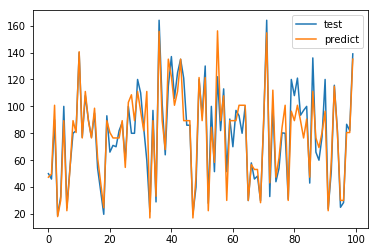

Text(0, 0.5, 'predict')

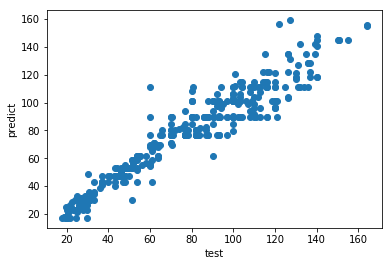

In [54]:
# plot the test dataset with the predicted one
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [55]:
from sklearn import metrics

In [56]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

7.461951512633347 106.5930132428561 10.324389243091144


In [57]:
regr.score(x_train, y_train),regr.score(x_test, y_test)

(0.9116009533071121, 0.9081318208293857)

In [58]:
# plot the learning curve to see how the model performs
from sklearn.model_selection import learning_curve

In [59]:
train_sizes, train_scores, valid_scores = learning_curve(regr, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)#,scoring = 'neg_mean_squared_error')

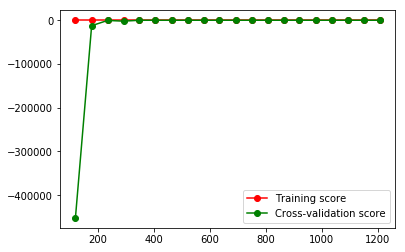

In [60]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [61]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor
parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, y_train)
y_pred_RF = RF_model.predict(x_test)

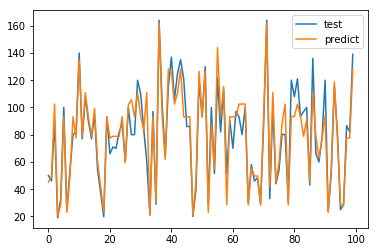

Text(0, 0.5, 'predict')

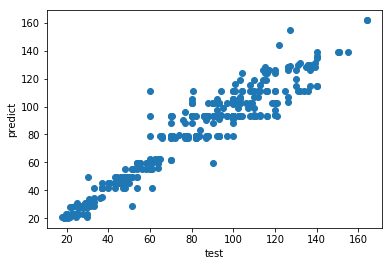

In [62]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [63]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

7.047224978496215 102.25180293595442 10.111963357130723


In [64]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.9226676167730161, 0.9118733332808924)

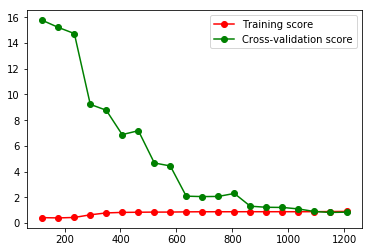

In [65]:
train_sizes, train_scores, valid_scores = learning_curve(RF_model, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, -test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [66]:
train_scores_mean

array([0.42827878, 0.40684634, 0.44276052, 0.64786232, 0.79513012,
       0.83507159, 0.84812657, 0.85899309, 0.86069379, 0.87743859,
       0.88542114, 0.88512857, 0.88626873, 0.88882126, 0.88721621,
       0.88868566, 0.88699224, 0.89174893, 0.90171515, 0.91155889])

In [67]:
-test_scores_mean

array([15.76573475, 15.20543273, 14.73210104,  9.22924859,  8.77517496,
        6.87913338,  7.18308143,  4.67559269,  4.44478357,  2.09743675,
        2.06287059,  2.0770958 ,  2.30785426,  1.31750527,  1.23387078,
        1.220682  ,  1.10534453,  0.9061745 ,  0.83227649,  0.85477397])

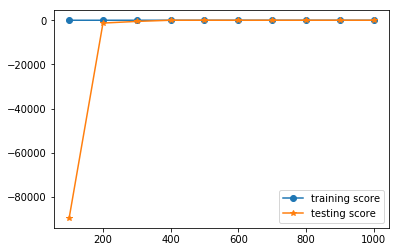

In [68]:
train_scores = []
test_scores = []
train_size = [100,200,300,400,500,600,700,800,900,1000]
for num in train_size:
    X_ = X[:num,[0,1,4,5]]
    y_ = X[:num,2]
    regr = LinearRegression()
    regr.fit(X_,y_)
    train_scores.append(regr.score(X_,y_))
    test_scores.append(regr.score(x_test,y_test))

plt.plot(train_size,train_scores,'o-',label = 'training score')
plt.plot(train_size,test_scores,'*-',label = 'testing score')
plt.legend()
plt.show()

In [69]:
# by using SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

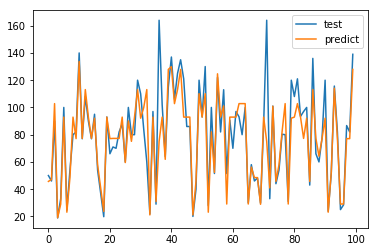

Text(0, 0.5, 'predict')

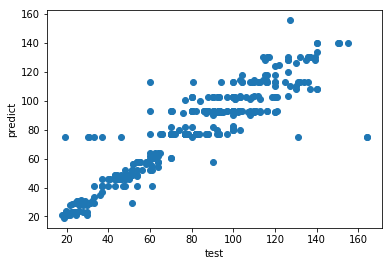

In [70]:
svr_rbf.fit(x_train,y_train)
y_pred_svr_rbf = svr_rbf.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_svr_rbf)
plt.xlabel('test')
plt.ylabel('predict')

In [71]:
MAE_SVR1=metrics.mean_absolute_error(y_test,y_pred_svr_rbf) 
MSE_SVR1=metrics.mean_squared_error(y_test,y_pred_svr_rbf)  
RMSE_SVR1= np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr_rbf))
print(MAE_SVR1,MSE_SVR1,RMSE_SVR1)

8.378813239015347 188.7088382773217 13.737133553886768


In [72]:
svr_rbf.score(x_train,y_train),svr_rbf.score(x_test,y_test)

(0.9277712259666452, 0.8373595338144609)

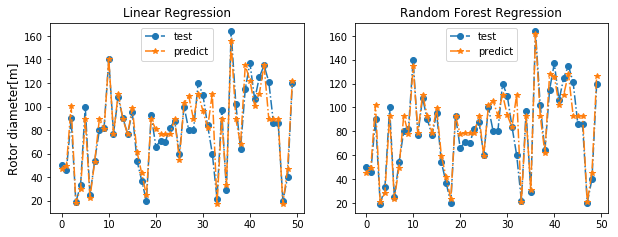

In [75]:
plt.figure(figsize=(10,3.5))
plt.subplot(121)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_LR[0:50],'-.*',markersize=6,label='predict')
plt.ylabel('Rotor diameter[m]',fontsize=12)
plt.legend()
plt.title('Linear Regression')

plt.subplot(122)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_RF[0:50],'-.*',markersize=6,label='predict')
plt.legend()
plt.title('Random Forest Regression')

plt.show()

## Summary

To estimate the rotor diameter of a wind turbine, it is possible to just use rated power and the location (On/Offshore).
1.Models like Linear regression, Random Forest, SVR and so on can be used.
2.Feature extraction can be done with polynominal processing or by personal defination.
3.Use test set, learning curve as well as other metrics indexes to evaluate the model's performance.
4.Feature selection can be applied if needed.

In [76]:
X = df_data.values.copy()
y = X[:,2]
x = X[:,[0,1,3]] # using all the features
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [77]:
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)
print(regr.score(x_train,y_train),regr.score(x_test,y_test))

7.497837291188865 99.51459868188745 9.975700410592102
0.9113227362121855 0.9081745017482556


In [78]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor
parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, y_train)
y_pred_RF = RF_model.predict(x_test)

MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)
print(RF_model.score(x_train,y_train),RF_model.score(x_test,y_test))

7.209568120964774 97.58846798720957 9.878687564004116
0.921794435105268 0.9099518079232237


In [79]:
# by Neural network
from sklearn.neural_network import MLPRegressor

parameters={ 'solver':'adam', 
            'activation':'relu',
            'alpha':1e-5,
            'hidden_layer_sizes': (10,10), 
            'random_state':1,
            'max_iter':100,
            'verbose':10,
            'learning_rate_init':.1}
mlp = MLPRegressor(**parameters) 
#mlp=MLPClassifier() # another way

#mlp = MLPRegressor(hidden_layer_sizes = (10,20)) # number of hidden layers
mlp.fit(x_train,y_train)
y_pred_NN = mlp.predict(x_test)

MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN) 
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
print(MAE_NN,MSE_NN,RMSE_NN)
mlp.score(x_train,y_train),mlp.score(x_test,y_test)

Iteration 1, loss = 41191.66904993
Iteration 2, loss = 7460.67832954
Iteration 3, loss = 656.78900214
Iteration 4, loss = 508.59031144
Iteration 5, loss = 470.37951241
Iteration 6, loss = 536.02349049
Iteration 7, loss = 443.03332437
Iteration 8, loss = 410.29166769
Iteration 9, loss = 377.38935944
Iteration 10, loss = 389.45918606
Iteration 11, loss = 358.44134529
Iteration 12, loss = 348.84330699
Iteration 13, loss = 368.30274008
Iteration 14, loss = 340.05303452
Iteration 15, loss = 307.39744193
Iteration 16, loss = 279.19497641
Iteration 17, loss = 255.59744585
Iteration 18, loss = 243.58021046
Iteration 19, loss = 205.06029172
Iteration 20, loss = 180.80338086
Iteration 21, loss = 158.28423008
Iteration 22, loss = 124.42935871
Iteration 23, loss = 116.87845736
Iteration 24, loss = 97.34314973
Iteration 25, loss = 88.49409373
Iteration 26, loss = 88.25378517
Iteration 27, loss = 90.79821343
Iteration 28, loss = 90.01512367
Iteration 29, loss = 95.24790347
Iteration 30, loss = 89.58

(0.8748500178135478, 0.8769674949089201)

In [80]:
svr_rbf.fit(x_train,y_train)
y_pred_svr_rbf = svr_rbf.predict(x_test)
MAE_SVR1=metrics.mean_absolute_error(y_test,y_pred_svr_rbf) 
MSE_SVR1=metrics.mean_squared_error(y_test,y_pred_svr_rbf)  
RMSE_SVR1= np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr_rbf))
print(MAE_SVR1,MSE_SVR1,RMSE_SVR1)
svr_rbf.score(x_train,y_train),svr_rbf.score(x_test,y_test)

7.602099894852285 135.37330911328954 11.635003614665942


(0.9293354763108392, 0.8750864524002976)

In [ ]:
# consider multi-output problems